<h1 align="center">University of Tehran</h1>
<h2 align="center">CA2</h2>
<h3 align="center">Aryan Bastani</h3>
<h3 align="center">810100088</h3>


</br>
</br>
<h1 align="center">Hidden Markov Models</h1>

## Overview

This project involves the implementation and analysis of a Hidden Markov Model (HMM) for audio signal processing. The HMM is a statistical model in which the system being modeled is assumed to be a Markov process with hidden states. The challenge lies in determining the hidden states based on the observable data.

### Importing needed libraries

In [6]:
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from hmmlearn import hmm
from python_speech_features import mfcc as Mfcc
from scipy.io import wavfile
from scipy.stats import multivariate_normal
import sklearn.metrics as sk_metrics
import librosa

# Load the data and Initialize vars

- **Number Labels:**
The script starts by defining a list of numbers from “0” to “9”. These numbers are used as labels for different classes of audio data. Each number represents a distinct class.

In [7]:
numbers = ["0","1","2","3", "4", "5", "6", "7", "8", "9"]

- **Data Paths:** The script then constructs a list of file paths for the audio data. Each file path corresponds to a different class of audio data. The file paths are constructed using the number labels and the Data directory. The *.wav extension indicates that the script is looking for .wav files, which are commonly used for storing audio data.

In [8]:
numbersDataPath = [f"Data\{numbers[0]}*.wav", f"Data\{numbers[1]}*.wav",
                   f"Data\{numbers[2]}*.wav", f"Data\{numbers[3]}*.wav",
                   f"Data\{numbers[4]}*.wav", f"Data\{numbers[5]}*.wav",
                   f"Data\{numbers[6]}*.wav", f"Data\{numbers[7]}*.wav",
                   f"Data\{numbers[8]}*.wav", f"Data\{numbers[9]}*.wav"]

<string>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:5: SyntaxWarning: invalid escape sequence '\{'
<string>:5: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequ

In [9]:
DS_train=dict()

# Preprocessing

### 1. do you think data segmentation is useful for this project? Why?


Given the dataset and the use of Hidden Markov Models (HMMs), data segmentation can indeed be an appropriate approach. Here’s why:

Sequential Data Modeling: HMMs are well-suited for modeling sequential data, such as speech signals, time series, or natural language sequences. By segmenting the data, we can capture temporal dependencies and transitions between hidden states effectively.
State Transitions: In an HMM, each hidden state corresponds to a specific segment of the data. For example, in speech recognition, different states might represent phonemes or words. By segmenting the data, we create a natural mapping to these states.
Training Efficiency: Smaller segments facilitate more efficient training. We can focus on local patterns within each segment, leading to faster convergence during model training.
Noise Isolation: Segmentation helps identify noisy or irrelevant portions of the data. By isolating these segments, we improve the quality of the training data.
In summary, data segmentation aligns well with the principles of HMMs and can enhance their performance. However, it’s essential to choose appropriate segment boundaries and consider the trade-offs based on the specific problem and dataset .


### 2. Extracting Features and differences between them

In the realm of artificial intelligence and machine learning, **feature extraction** and **feature selection** play pivotal roles. These steps significantly impact the performance of our models. Let's delve into some essential audio features and explore their relationships:

- #### Mel-Frequency Cepstral Coefficients (MFCC)
    - **Definition**: MFCCs represent the short-term power spectrum of a sound signal.
    - **Purpose**: They capture spectral characteristics, emphasizing perceptually relevant features.
    - **Extraction Process**:
        - Compute the power spectrum.
        - Apply the Mel filterbank to obtain Mel-scale frequencies.
        - Take the logarithm of filterbank energies.
        - Apply the Discrete Cosine Transform (DCT) to yield MFCCs.
    - **Applications**: Speech recognition, speaker identification, and music genre classification.
    - **Relation to Other Features**: Often used as input features for other models due to their effectiveness in capturing spectral information.

- #### Zero Crossing Rate
    - **Definition**: Counts zero crossings in the audio signal.
    - **Purpose**: Provides insights into temporal variations, indicating noisiness or silence.
    - **Extraction Process**:
        - Calculate the sign of audio samples.
        - Count zero crossings.
    - **Applications**: Voice activity detection, audio segmentation, and noise classification.
    - **Relation to Other Features**: Complementary to features like MFCCs, focusing on temporal aspects.

- #### Mel-Spectrogram
    - **Definition**: Represents the power spectral density in Mel-scale frequencies.
    - **Purpose**: Combines spectrogram and Mel-scale filtering benefits.
    - **Extraction Process**:
        - Compute Short-Time Fourier Transform (STFT).
        - Apply Mel filterbank to STFT magnitude.
    - **Applications**: Music genre classification, speech recognition, and sound event detection.
    - **Relation to Other Features**: Linked to MFCCs due to shared Mel-scale filtering.

-   #### Chroma Features
    - **Definition**: Represents the 12 distinct pitch classes (notes) in music.
    - **Purpose**: Captures harmonic content and tonality.
    - **Extraction Process**:
        - Compute STFT of the audio signal.
        - Sum magnitudes of STFT bins corresponding to each pitch class.
    - **Applications**: Music genre classification, chord recognition, and melody extraction.
    - **Relation to Other Features**: Complementary to features like MFCCs and spectrogram-based features.

Remember that feature choice depends on the task and data characteristics. Intelligently combining these features enhances model performance. 🎧🔍

### Calculate MFCC coefs
This function calculates the MFCCs for a list of audio files. The function takes as input a list of file paths (**numberSoundsPath**) to the audio files. For each audio file, it reads the file using **wavfile.read**, which returns the sampling rate and the audio data. It then calculates the MFCCs for the audio data using the Mfcc function, with the sampling rate and a Fast Fourier Transform (FFT) size of 1024. The resulting MFCCs are truncated or padded to match the length specified by **min_audio_frame**. The MFCCs for each audio file are stored in the list **mfccCoefs**, which is returned by the function.

In [10]:
def calcMfccCoefs(numberSoundsPath):
    mfccCoefs = []
    for numberSound in numberSoundsPath:
        audio, samplingRate = librosa.load(numberSound, sr=None)
        audio, _ = librosa.effects.trim(audio, top_db=50, frame_length=1024)
        currentCoef = Mfcc(audio, samplerate=samplingRate, nfft=1024)[:25, :]
        if(len(currentCoef) < 25):
            currentCoef = np.pad(currentCoef, ((0, 25 - len(currentCoef)), (0, 0)), mode='edge')
        mfccCoefs.append(currentCoef)
    return mfccCoefs

### Plot Mfcc Heatmap
This function creates a heatmap visualization of the MFCCs. The function takes as input a title for the plot (**title**) and a list of MFCCs (**mfccs**). It uses the **matshow** function from the **matplotlib.pyplot** library to create the heatmap. The MFCCs are transposed before being passed to **matshow** to ensure that the time dimension is represented on the x-axis and the MFCC coefficients are represented on the y-axis. The colormap is set to ‘Spectral’ for better visualization. The plot is labeled appropriately and a colorbar is added for reference. Finally, the plot is displayed using **plt.show()**.

In [11]:
def plotMfccHeatmap(title, mfccs):
    plt.matshow(mfccs[0].T, cmap='Spectral',origin='lower', aspect='auto')
    plt.title(f"{title} number Mfcc heatmap")
    plt.ylabel('Coefficients')
    plt.xlabel('Time')
    plt.colorbar()
    plt.show()

### Using of functions
- **Initialize MFCC Coefficients List:**
    -   The script starts by initializing an empty list **allMfccCoefs**. This list will be used to store the MFCCs for all the audio files.
- **Iterate Over Audio Files:**
    The script then iterates over the list of numbers, which are used as labels for different classes of audio data. For each number, it does the following:
    
    -   Get Audio Files: It uses the **glob.glob** function to get a list of all audio files corresponding to the current number. The file paths are obtained from the **numbersDataPath** list, which was constructed earlier.
    -   Calculate MFCCs: It calls the **calcMfccCoefs** function to calculate the MFCCs for the current set of audio files. The function returns a list of MFCCs, which is stored in the **mfccsCoefs** variable.
    -   Store MFCCs: It appends the calculated MFCCs to the **allMfccCoefs** list. This list now contains the MFCCs for all the audio files processed so far.
    -   Plot MFCCs: It calls the **plotMfccHeatmap** function to create a heatmap visualization of the calculated MFCCs. The title of the plot is set to the current number.

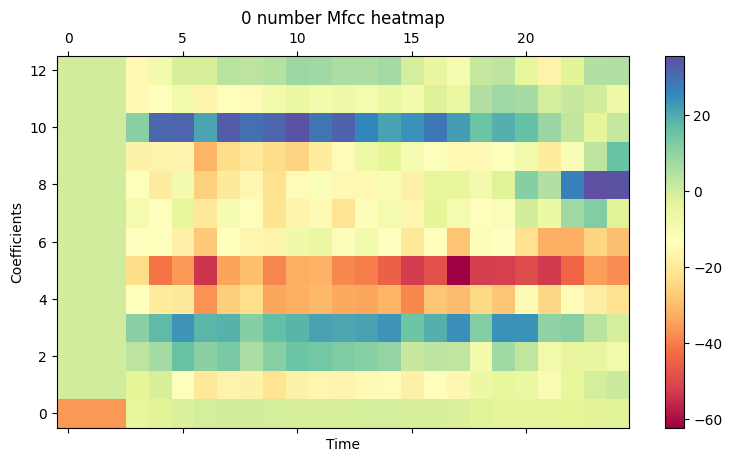

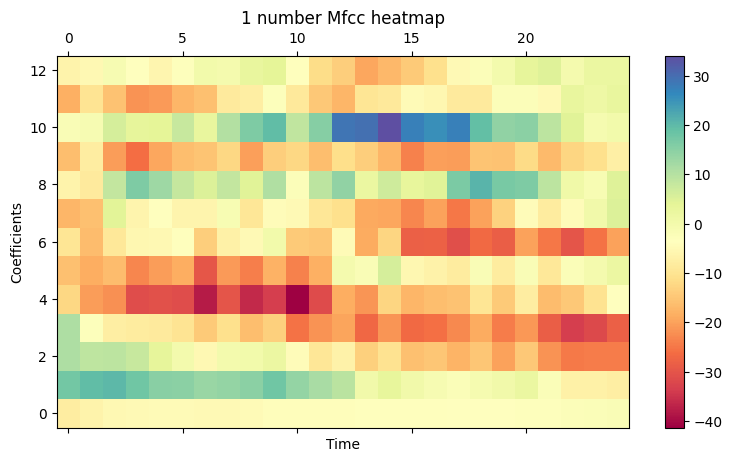

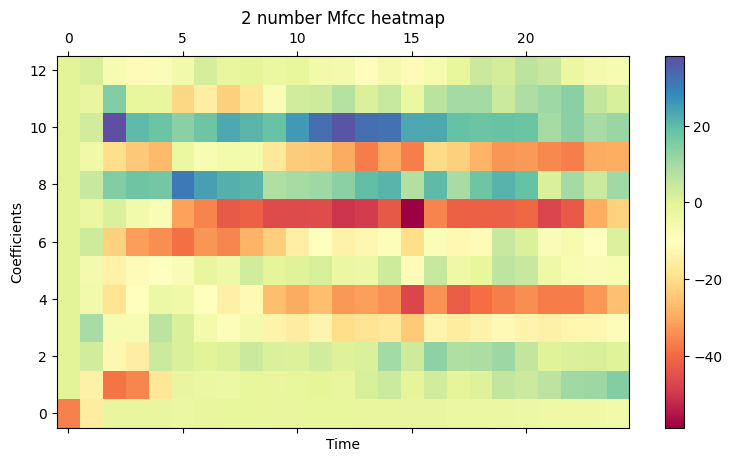

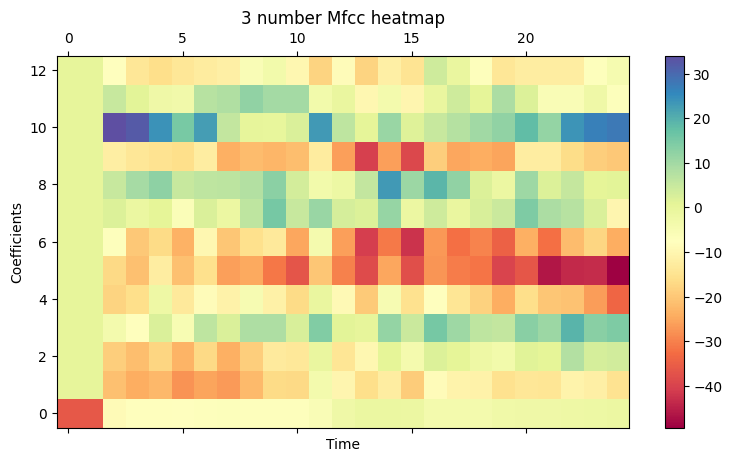

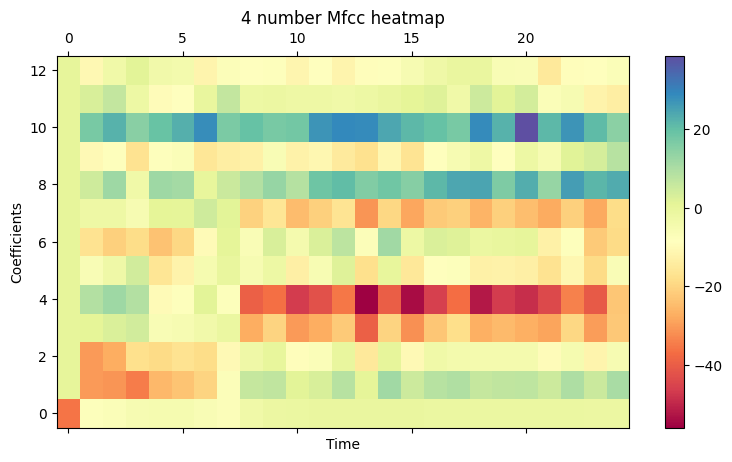

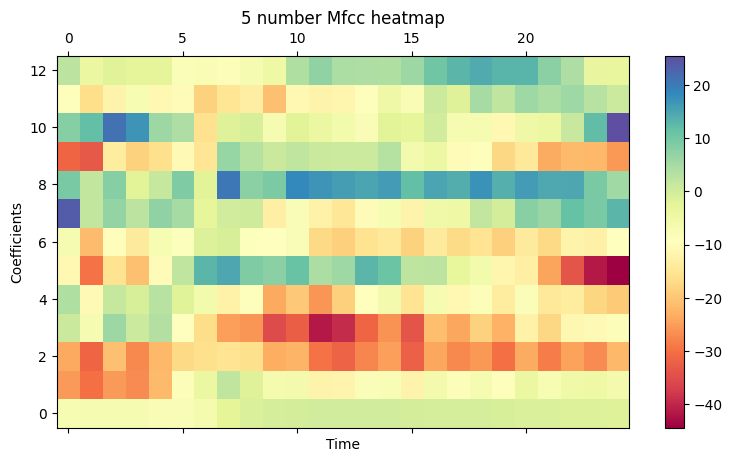

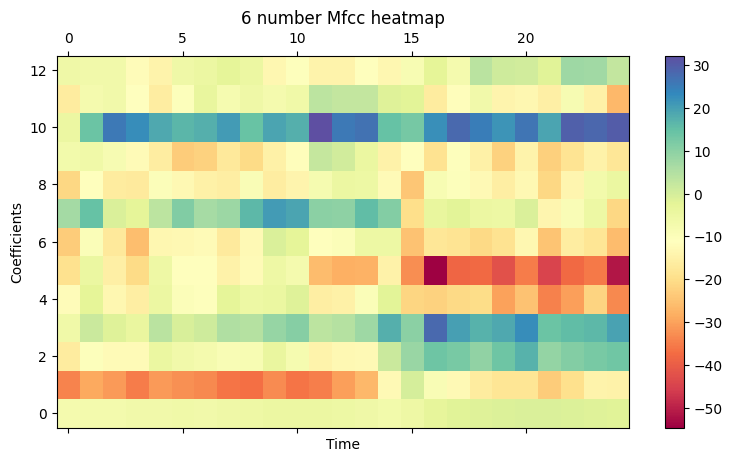

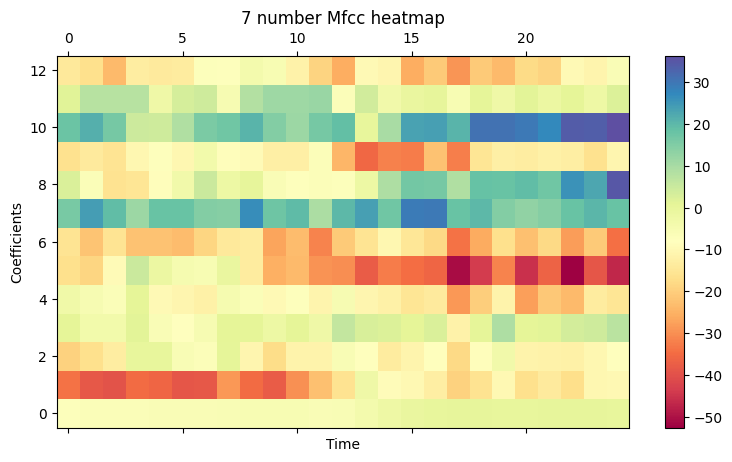

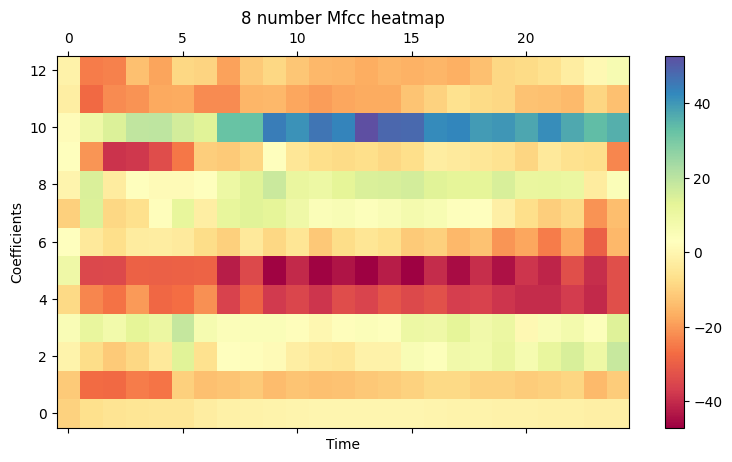

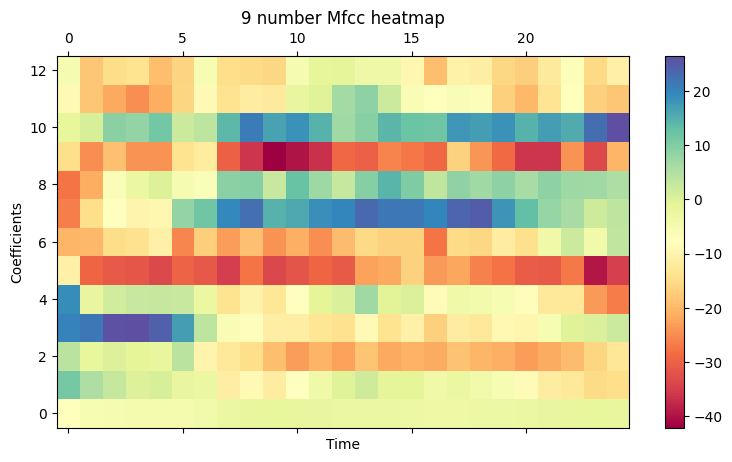

In [12]:
allMfccCoefs = []
allNums = []
for i in range(len(numbers)):
    currentNumberData = glob.glob(numbersDataPath[i])
    mfccsCoefs = calcMfccCoefs(currentNumberData)
    allMfccCoefs.append(mfccsCoefs)
    allNums.append([i] * len(mfccsCoefs))
    plotMfccHeatmap(numbers[i], mfccsCoefs)

### 3. Investigate the robustness and sensitivity of MFCC features to variations in audio signals.

1. **Robustness**: MFCCs are known for their robustness in various conditions. They are capable of capturing intricate speech nuances, making them resilient to variations in accents, background noise, and speech impediments. In speaker recognition systems, MFCCs have shown good performance in noise-free environments, but the performance can deteriorate in the presence of noise. To improve the noise-robustness, signal processing techniques such as DC removal, pre-emphasis, and Cepstral Mean Variance Normalization (CMVN) are investigated in the extraction of MFCC.

2. **Sensitivity**: The sensitivity of MFCCs can be affected by several factors. For instance, the sampling rate at which an audio signal is encoded may affect the robustness when using very high-frequency rates. Perceptual audio coders may also affect descriptors because they introduce perturbations to the original audio signal, in particular by reducing high-frequency content.

3. **Adaptive Mechanism**: An adaptive mechanism has been proposed to improve the robustness of MFCCs. This mechanism enables the speaker recognition system to perform well for both high and low Signal-to-Noise Ratios (SNRs). By combining the robustness of Gammatone Frequency Cepstral Coefficients (GFCC) in noisy speech and the robustness of MFCC in clean speech, the recognition effect of the system can be improved adaptively in different environments.

In conclusion, while MFCCs are generally robust and sensitive to variations in audio signals, their performance can be affected by factors such as noise, sampling rate, and audio encoding. Techniques such as CMVN and adaptive mechanisms can be used to improve their robustness and sensitivity.

### 4. Are there specific cases where MFCC coefficients have lower efficiency?

Yes, there are certain situations where Mel Frequency Cepstral Coefficients (MFCCs) may have lower efficiency:

1. **Noise**: MFCCs have shown good performance in noise-free environments, but the performance can deteriorate in the presence of noise. Techniques such as DC removal, pre-emphasis, and Cepstral Mean Variance Normalization (CMVN) are often used to improve the noise-robustness of MFCCs.

2. **Sampling Rate**: The sampling rate at which an audio signal is encoded may affect the robustness of MFCCs when using very high-frequency rates. 

3. **Audio Encoding**: Perceptual audio coders may affect the MFCCs because they introduce perturbations to the original audio signal, particularly by reducing high-frequency content.

4. **Speaker's Identity**: The traits recovered from MFCCs are expected to be unaffected by the speaker’s identity or environmental noise². However, in practice, this may not always be the case, and MFCCs may vary between different speakers or environments.

In conclusion, while MFCCs are generally robust and sensitive to variations in audio signals, their performance can be affected by factors such as noise, sampling rate, and audio encoding.

### 5. In the calculation of Mel-Frequency Cepstral Coefficients (MFCCs), why do the used frames overlap with each other?

The frames in MFCC calculation overlap with each other for several reasons:

1. **Equal Weightage to Each Sample**: Due to the windowing process, the end samples in the frame get attenuated. Hence, the MFCC vector for this frame is less affected by these samples. These samples can be encoded in the next frame's MFCCs if the next frame has an overlap of at least 50%.

2. **Redundancy in MFCCs**: By overlapping frames (at > 50%), we increase redundancy in the MFCCs. This redundancy can be exploited in improved delta-MFCCs and delta-delta-MFCCs computation as we will have a more smooth difference function approximation.

3. **Frequency Changes Over Time**: Frequencies in a signal change over time, so it doesn’t make sense to do the Fourier transform across the entire signal as we would lose the frequency contours of the signal over time.

In conclusion, overlapping frames in MFCC calculation helps to ensure that each sample in the sound signal is given equal weightage, increases redundancy in the MFCCs, and allows for the capture of frequency changes over time.

### 6. Why in most audio-related projects, only 12 or 13 initial MFCC coefficients are commonly used?

The Mel Frequency Cepstral Coefficients (MFCCs) are a type of feature used in audio signal processing, particularly in speech and music recognition systems. The reason why only the first 12 or 13 MFCC coefficients are commonly used in most audio-related projects is due to the nature of the MFCCs themselves and the type of information they capture:

1. **Human Auditory System**: The lower order MFCCs capture the broad shape of the power spectrum, and they are often the most informative for speech recognition tasks. This is because they closely match the human auditory system's response and are less sensitive to variations in the signal and noise.

2. **Noise Robustness**: Higher order coefficients represent finer details of the spectrum, but they are also more susceptible to noise and therefore less reliable. 

3. **Dimensionality Reduction**: Using only the first 12 or 13 coefficients can help to reduce the dimensionality of the data, making the subsequent processing steps more efficient and manageable.

4. **De-correlation**: The Discrete Cosine Transform (DCT), which is used to compute the MFCCs, has a property that it de-correlates the filter bank coefficients. This means that the lower order coefficients are less correlated with the higher order coefficients.

In conclusion, the first 12 or 13 MFCC coefficients are commonly used because they capture the most important characteristics of the audio signal, are more robust to noise, help in reducing the dimensionality of the data, and are less correlated with the higher order coefficients.

## Getting to know HMM
### 1. Explain what States and Observations mean. In this exercise, what are the States, and how are Observations obtained?
In the context of Hidden Markov Models (HMMs), "States" and "Observations" have specific meanings:

1. **States**: These are the underlying variables that generate the observed data, but they are not directly observable. They represent the internal structure of the model that we cannot see directly but want to learn about. In an HMM, the state is assumed to be a Markov process, meaning the probability of transitioning to any particular state depends solely on the current state and not on the sequence of states that preceded it. In our Exercise, States are numbers(0, 1, 2, ..., 9).

2. **Observations**: These are the variables that are measured and observed. They are the data that we see and are typically the result of some hidden state. The relationship between the hidden states and the observations is modeled using a probability distribution. In our Exercise, Observations are features of audios obtained by MFCC.

### 2. Hidden Markov Models (HMMs) can be categorized based on the degree of dependence among hidden states. The model you are implementing in this exercise is an Order-First HMM. Investigate its naming rationale and its characteristics, and explain how it differs from other models in this category.

Hidden Markov Models (HMMs) are statistical models where the system being modeled is assumed to be a Markov process with unobserved (hidden) states. The categorization of HMMs based on the degree of dependence among hidden states refers to the order of the Markov process.

An Order-First HMM, as the name suggests, is a first-order Markov process. This means that the probability of transitioning to any particular state depends solely on the current state and not on the sequence of states that preceded it. This property is known as the Markov property.

The naming rationale for an Order-First HMM comes from this Markov property. The "order" in Order-First refers to the number of previous states that the transition probabilities depend on. In a first-order HMM, the transition probabilities depend only on the current state, hence the name Order-First.

The characteristics of an Order-First HMM include its simplicity and efficiency. Because the transition probabilities only depend on the current state, the model is relatively simple and requires less computational resources compared to higher-order models.

In contrast, higher-order HMMs allow the transition probabilities to depend on a sequence of previous states. While this can capture more complex dependencies, it also increases the complexity of the model and the computational resources required.

In conclusion, an Order-First HMM is a simple and efficient model that is suitable for many applications. However, its ability to capture complex dependencies is limited compared to higher-order models.

### 3. Research about Hidden Markov Models (HMMs) and explain why this model is suitable for analyzing and understanding which phenomena. Provide the rationale behind this topic.
Hidden Markov Models (HMMs) are statistical models used to describe systems that change between states with specific probabilities. The reason it is called “hidden” is that although the states produce observable outputs or emissions, they are not directly observable.

HMMs are particularly suitable for analyzing and understanding phenomena that can be modeled as a sequence of observable data generated by a sequence of hidden states. This makes HMMs applicable in a wide range of fields:

1. **Speech Recognition**: HMMs are widely used in speech recognition, where the hidden states could represent the phonemes (distinct units of sound) that make up speech, and the observations could be the audio signals.

2. **Bioinformatics**: In bioinformatics, HMMs are used for predicting protein or gene structures.

3. **Finance**: In finance, HMMs can be used to model the hidden states of the market and thus help in making investment decisions.

4. **Natural Language Processing (NLP)**: HMMs are used in NLP for tasks such as part-of-speech tagging and named entity recognition.

The rationale behind using HMMs for these phenomena is that they provide a robust framework for dealing with time-series data, especially when the underlying process generating the data is not directly observable. The Markov property of HMMs, which states that the probability of transitioning to any particular state depends solely on the current state and not on the sequence of states that preceded it, makes inference efficient.

### 4. What are the advantages and disadvantages of Hidden Markov Models (HMMs)?

#### Advantages of HMMs
1. **Time-Dependence Modeling**: One of the key advantages of HMMs is that they allow for modeling the time-dependence of the data. This means that the probabilities of the hidden states are influenced by the previous hidden states. This makes HMMs well-suited for modeling sequences of data that have a temporal structure.
2. **Handling Missing or Partially Observable Data**: HMMs are flexible in the sense that they can handle missing or partially observable data. This is because the hidden states are not directly observable, but instead are inferred from the observed sequence.
3. **Representation of Variance**: HMMs are able to represent the variance of appliances' power demands through probability distributions.

#### Disadvantages of HMMs
1. **Assumption of Markovian Dynamics**: HMMs assume Markovian dynamics, which means future states depend only on the current state. This may not always be a realistic assumption for complex systems.
2. **Sensitivity to Initialization Parameters**: HMMs are sensitive to the choice of initialization parameters.
3. **Inability to Capture Long-Term Dependencies**: HMMs have limitations like many unstructured parameters, an inability to capture long-term dependencies.
4. **Failure to Represent Continuously Varying Power Demand**: HMMs represent the behaviour of an appliance using a finite number of static distributions, and therefore fail to represent appliances with a continuously varying power demand.

Despite these limitations, HMMs have proven to be powerful models for a wide range of sequential data problems.

### 5. Various types of Hidden Markov Model (HMM) models exist. Research about them and briefly examine a few cases.
In previous discussions, we’ve explored First-order and Higher-order models as distinct types of Hidden Markov Models (HMMs). However, there are several other models worth noting:

1. Left-Right Model: This model organizes states in a left-to-right structure, implying that transitions can only proceed from left to right. This model is frequently employed in speech recognition.

2. Continuous Model: This model is utilized when the observations emitted from the hidden states are continuous, as opposed to discrete. This is typical in applications such as speech and gesture recognition.

3. Mixture Model: This model amalgamates multiple HMMs to form a composite model. Each constituent HMM in the mixture symbolizes a different mode of the system, and the model can transition between these modes.

4. Factorial Model: This model introduces a factorial structure into the emission probabilities, enabling dependencies between different components of the observation vector.

## Implementation

### PART 1 : Implementation with Libraries

In [28]:
def generateData(MfccCoefs, allNums, numbers):
    xTestData = []
    yTestData = []
    dsTrain = {}

    for i in range(len(numbers)):
        xTrain, xTest, yTrain, yTest = train_test_split(np.array(MfccCoefs[i]), np.array(allNums[i]), test_size=0.2, random_state=42)
        dsTrain[numbers[i]] = xTrain.reshape((xTrain.shape[0] * xTrain.shape[1], xTrain.shape[2]))
        xTestData.append(list(xTest))
        yTestData.append(yTest)

    xTestData = np.array(xTestData)
    xTestData = xTestData.reshape((xTestData.shape[0] * xTestData.shape[1], xTestData.shape[2], xTestData.shape[3]))
    yTestData = np.array(yTestData).flatten()
    return(xTestData, yTestData, dsTrain)

In [29]:
def generateModels(numbers, dsTrain):
    models=[]
    for num in numbers:
        currentModel = hmm.GaussianHMM(n_components=15, covariance_type='tied')
        currentModel.fit(dsTrain[num])
        models.append(currentModel)
    return(models)

In [30]:
def generatePredicts(xTestData, models):       
    predictions=[]
    for i in range(xTestData.shape[0]):
        scores=[]
        for currentModel in models:
            scores.append(currentModel.score(xTestData[i,:]))
        label = np.argmax(np.array(scores))
        predictions.append(label)
    return(predictions)

In [31]:

def generateConfMatrix(yTestData, predicts, numbers):
    confMatrix = [[0] * len(numbers) for _ in range(len(numbers))]
    for true_label, pred_label in zip(yTestData, predicts):
        confMatrix[true_label][pred_label] += 1
    
    ySum = [0 for i in range(len(numbers))]
    for i in range(len(numbers)):
        for y in yTestData:
            if(y == i):
                ySum[i] += 1

    for i in range(len(numbers)):
        for j in range(len(numbers)):
            percentage = (confMatrix[i][j] / ySum[i]) * 100 if ySum[i] != 0 else 0
            confMatrix[i][j] = round(percentage, 2)
    
    return(confMatrix)

In [32]:
def plot_conf_matrix(confMatrix, numbers):
    plt.imshow(confMatrix, interpolation='nearest', cmap=plt.cm.YlGn)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(numbers)), numbers)
    plt.yticks(np.arange(len(numbers)), numbers)
    for i in range(len(numbers)):
        for j in range(len(numbers)):
            plt.text(j, i, str(confMatrix[i][j]), ha='center', va='center', color='black')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

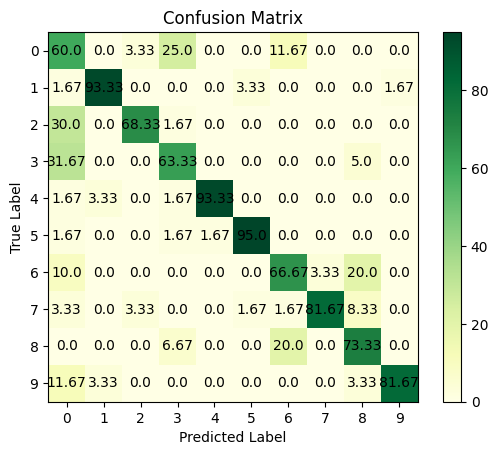

In [33]:
xTestData, yTestData, dsTrain = generateData(allMfccCoefs, allNums, numbers)
models = generateModels(numbers, dsTrain)
predictions = generatePredicts(xTestData, models)
confMatrix = generateConfMatrix(yTestData, predictions, numbers)
plot_conf_matrix(confMatrix, numbers)

### PART 2 : Implementation from Scratch

In [34]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:,0] =  self.initial_prob[:,0] * observation_matrix[:,0]
            else:
                alpha[:,t] = observation_matrix[:,t] * np.matmul(self.transition_matrix.T, alpha[:,t-1])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.matmul(self.transition_matrix, (observation_matrix[:,t+1] * beta[:,t+1]))
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = multivariate_normal.pdf(obs.T,mean =self.mean[:,s],cov = self.covariances[:,:,s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs=obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = sum(alpha[:,t] * beta[:,t+1] * B[:,t+1]) * self.transition_matrix
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:,t] * beta[:,t]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:,T-1] * beta[:,T-1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = np.reshape(gamma[:, 0],(-1,1))
        expected_transition = self._stochasticize(xi_sum/np.sum(xi_sum,axis=(0,1)))

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood

In [36]:
hmmModels = []

genre_HMM_models = []

for num in numbers:
    model = HMM(num_hidden_states = 10)
    model.train(dsTrain[num].T/np.amax(dsTrain[num].T),num_iterations=2)
    hmmModels.append(model)

scratchPredicts=[]
for i in range(xTestData.shape[0]):
    scores=[]
    for model in hmmModels:
        scores.append(model.score(xTestData[i,:].T/np.amax(xTestData[i,:].T)))
    num = np.argmax(np.array(scores))
    scratchPredicts.append(num)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_2320\1862477177.py:25: RuntimeWarning: invalid value encountered in divide
  alpha[:, t] /= alpha_sum
C:\Users\Aryan\AppData\Local\Temp\ipykernel_2320\1862477177.py:26: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(alpha_sum)


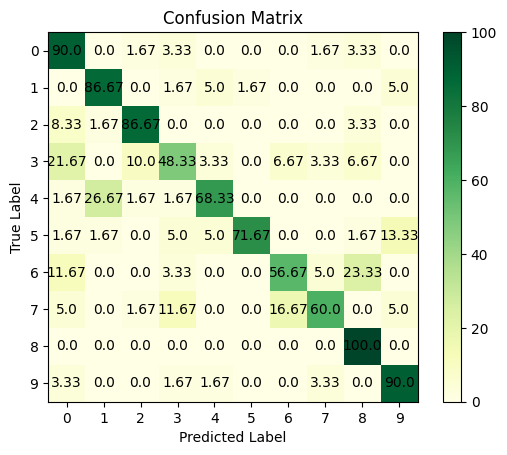

In [37]:
scratchConfMatrix = generateConfMatrix(yTestData, scratchPredicts, numbers)     
plot_conf_matrix(scratchConfMatrix, numbers)